# Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import ast

# Loading Dataset

In [6]:
df=pd.read_csv('/content/dtw_results.csv')

# Creating extra features like mean and standard **deviation**

In [9]:

# Convert string representation of lists to actual lists
df['Sequence_Ay'] = df['Sequence_Ay'].apply(lambda x: ast.literal_eval(x))
df['Sequence_GyroZ'] = df['Sequence_GyroZ'].apply(lambda x: ast.literal_eval(x))

# Calculating the mean of Sequence_Ay and Sequence_GyroZ
df['Mean_Sequence_Ay'] = df['Sequence_Ay'].apply(lambda x: sum(x) / len(x))
df['Mean_Sequence_GyroZ'] = df['Sequence_GyroZ'].apply(lambda x: sum(x) / len(x))

# Calculating the standard deviation of Sequence_Ay and Sequence_GyroZ
df['Std_Sequence_Ay'] = df['Sequence_Ay'].apply(lambda x: pd.Series(x).std())
df['Std_Sequence_GyroZ'] = df['Sequence_GyroZ'].apply(lambda x: pd.Series(x).std())

# Show the updated DataFrame
print(df.head())

   Class Class_String                                        Sequence_Ay  \
0      0   zero-event  [0.3970875336956283, 0.38134619337728287, 0.37...   
1      0   zero-event  [0.37547316812067394, 0.3819462879814746, 0.37...   
2      0   zero-event  [0.38867042494863807, 0.390336053111909, 0.374...   
3      0   zero-event  [0.32727676396841904, 0.3162414817052268, 0.32...   
4      0   zero-event  [0.3254138916596795, 0.37014585543515277, 0.35...   

                                      Sequence_GyroZ   DTW_Ay_1   DTW_Ay_2  \
0  [0.42465424137129526, 0.4238252449059724, 0.42...  12.909341  10.112074   
1  [0.4308316429275173, 0.4280923312815052, 0.427...  14.301442  10.119611   
2  [0.4360323840252456, 0.43461437541759723, 0.43...  13.411482  11.670119   
3  [0.40633940043531064, 0.4024676819073564, 0.40...  15.093140   8.456779   
4  [0.42823927613854684, 0.43055578554394636, 0.4...  11.736273   7.901748   

   DTW_Ay_3  DTW_Ay_4   DTW_Ay_5  DTW_GyroZ_1  DTW_GyroZ_2  DTW_GyroZ_3  \

In [10]:
df.head()

,Class,Class_String,Sequence_Ay,Sequence_GyroZ,DTW_Ay_1,DTW_Ay_2,DTW_Ay_3,DTW_Ay_4,DTW_Ay_5,DTW_GyroZ_1,DTW_GyroZ_2,DTW_GyroZ_3,DTW_GyroZ_4,DTW_GyroZ_5,Mean_Sequence_Ay,Mean_Sequence_GyroZ,Std_Sequence_Ay,Std_Sequence_GyroZ
0,0,zero-event,"[0.3970875336956283, 0.38134619337728287, 0.37...","[0.42465424137129526, 0.4238252449059724, 0.42...",12.909341,10.112074,3.814157,6.793771,23.012110,21.877141,14.744687,14.372507,9.023143,22.529021,0.388101,0.424839,0.017754,0.002228
1,0,zero-event,"[0.37547316812067394, 0.3819462879814746, 0.37...","[0.4308316429275173, 0.4280923312815052, 0.427...",14.301442,10.119611,3.304515,8.102754,23.780371,22.823375,15.422847,14.909267,9.574023,22.564639,0.385639,0.435579,0.012907,0.002775
2,0,zero-event,"[0.38867042494863807, 0.390336053111909, 0.374...","[0.4360323840252456, 0.43461437541759723, 0.43...",13.411482,11.670119,6.049410,6.586424,26.647044,21.133441,14.411265,13.198723,7.595757,19.774651,0.368130,0.424312,0.034772,0.008293
3,0,zero-event,"[0.32727676396841904, 0.3162414817052268, 0.32...","[0.40633940043531064, 0.4024676819073564, 0.40...",15.093140,8.456779,3.872495,8.538492,23.338398,18.920546,12.733936,13.156686,9.142890,20.346622,0.358378,0.423303,0.026458,0.015387
4,0,zero-event,"[0.3254138916596795, 0.37014585543515277, 0.35...","[0.42823927613854684, 0.43055578554394636, 0.4...",11.736273,7.901748,2.981111,5.443344,20.440373,20.152613,13.761133,12.304267,6.292949,17.426893,0.395368,0.419405,0.027888,0.015178


# plotting ROC CURVE
* ROC CURVE (WITHOUT MEAN AND STANDARD DEVIATION AS FEATURES)
* ROC CURVE (WITH ONLY MEAN AND STANDARD DEVIATION AS FEATURES)
* ROC CURVE WITH ALL FEATURES COMBINED


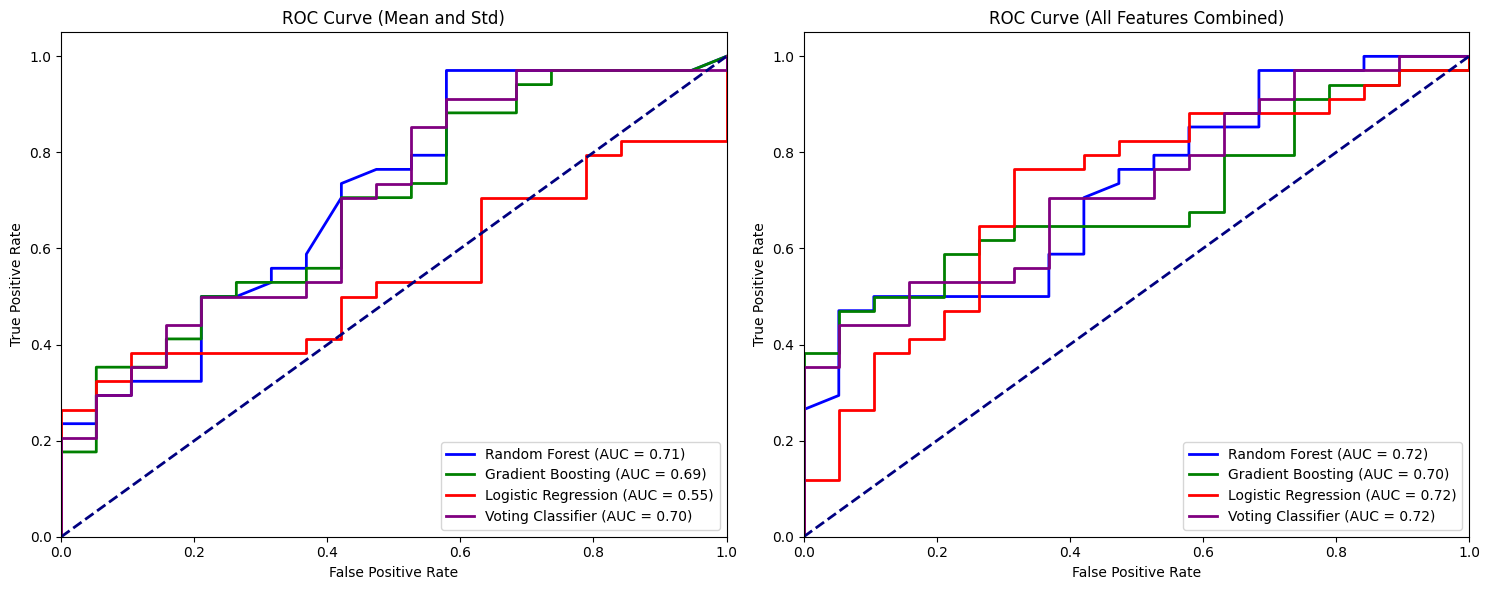

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is already loaded and cleaned

# First set of features (without mean and standard deviation)
features_1 = ['DTW_Ay_1', 'DTW_Ay_2', 'DTW_Ay_3', 'DTW_Ay_4', 'DTW_Ay_5',
              'DTW_GyroZ_1', 'DTW_GyroZ_2', 'DTW_GyroZ_3', 'DTW_GyroZ_4', 'DTW_GyroZ_5']

# Second set of features (only mean and standard deviation)
features_2 = ['Mean_Sequence_Ay', 'Mean_Sequence_GyroZ', 'Std_Sequence_Ay', 'Std_Sequence_GyroZ']

# Third set of features (all features combined)
features_3 = features_1 + features_2

# Define function to plot ROC curves for a given set of features
def plot_roc_curves(X, y, ax, title):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize classifiers
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    gb_clf = GradientBoostingClassifier(random_state=42)
    log_reg_clf = LogisticRegression(max_iter=1000, random_state=42)
    voting_clf = VotingClassifier(estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('log_reg', log_reg_clf)
    ], voting='soft')

    # Train classifiers
    rf_clf.fit(X_train, y_train)
    gb_clf.fit(X_train, y_train)
    log_reg_clf.fit(X_train, y_train)
    voting_clf.fit(X_train, y_train)

    # Predict probabilities
    y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
    y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
    y_prob_log_reg = log_reg_clf.predict_proba(X_test)[:, 1]
    y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curves and AUC scores
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
    roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

    fpr_voting, tpr_voting, _ = roc_curve(y_test, y_prob_voting)
    roc_auc_voting = auc(fpr_voting, tpr_voting)

    # Plot ROC curves
    ax.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
    ax.plot(fpr_gb, tpr_gb, color='green', lw=2, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
    ax.plot(fpr_log_reg, tpr_log_reg, color='red', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
    ax.plot(fpr_voting, tpr_voting, color='purple', lw=2, label='Voting Classifier (AUC = %0.2f)' % roc_auc_voting)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot ROC curves for the second set of features
plot_roc_curves(df[features_2], df['Class'], axs[0], 'ROC Curve (Mean and Std)')

# Plot ROC curves for the third set of features
plot_roc_curves(df[features_3], df['Class'], axs[1], 'ROC Curve (All Features Combined)')

plt.tight_layout()
plt.show()


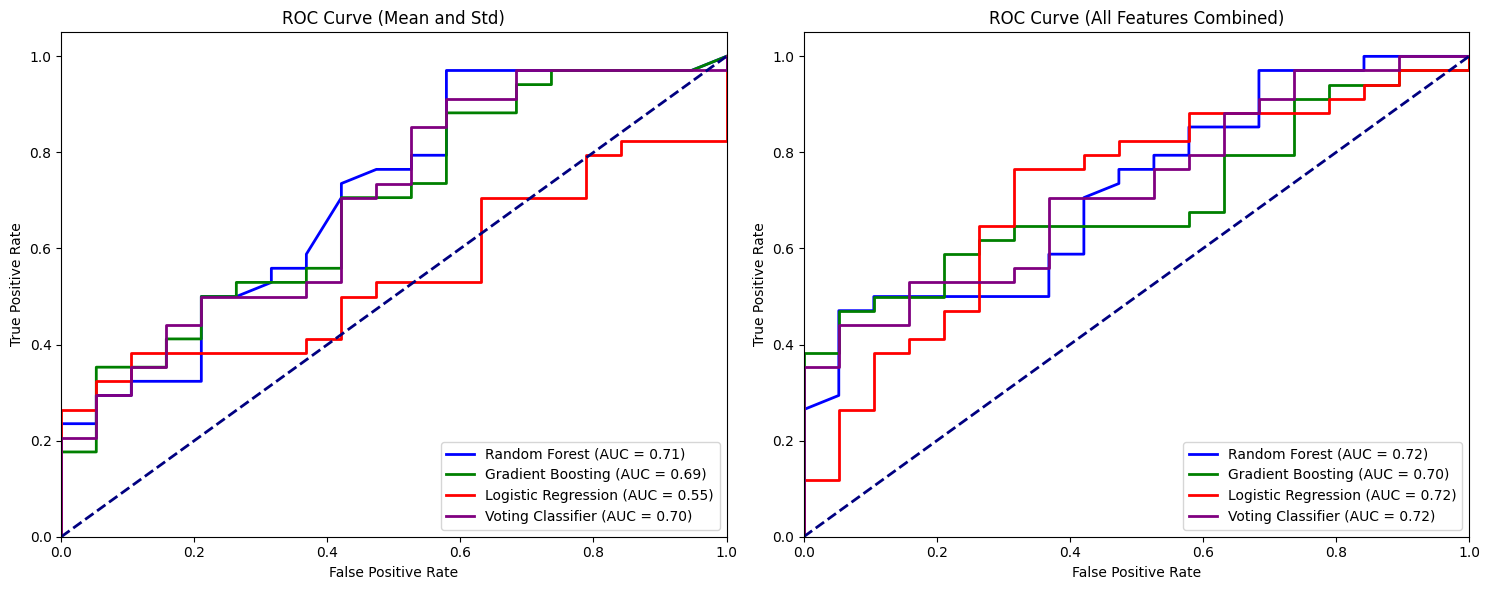

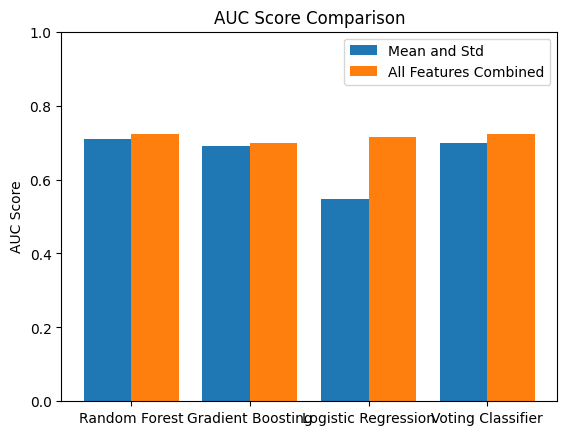

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already loaded and cleaned

# Feature sets
features_1 = ['DTW_Ay_1', 'DTW_Ay_2', 'DTW_Ay_3', 'DTW_Ay_4', 'DTW_Ay_5',
              'DTW_GyroZ_1', 'DTW_GyroZ_2', 'DTW_GyroZ_3', 'DTW_GyroZ_4', 'DTW_GyroZ_5']
features_2 = ['Mean_Sequence_Ay', 'Mean_Sequence_GyroZ', 'Std_Sequence_Ay', 'Std_Sequence_GyroZ']
features_3 = features_1 + features_2

# Function to compute AUC and return it along with ROC data
def compute_auc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize classifiers
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    gb_clf = GradientBoostingClassifier(random_state=42)
    log_reg_clf = LogisticRegression(max_iter=1000, random_state=42)
    voting_clf = VotingClassifier(estimators=[
        ('rf', rf_clf),
        ('gb', gb_clf),
        ('log_reg', log_reg_clf)
    ], voting='soft')

    # Train classifiers
    rf_clf.fit(X_train, y_train)
    gb_clf.fit(X_train, y_train)
    log_reg_clf.fit(X_train, y_train)
    voting_clf.fit(X_train, y_train)

    # Predict probabilities
    y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
    y_prob_gb = gb_clf.predict_proba(X_test)[:, 1]
    y_prob_log_reg = log_reg_clf.predict_proba(X_test)[:, 1]
    y_prob_voting = voting_clf.predict_proba(X_test)[:, 1]

    # Calculate ROC curves and AUC scores
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)

    fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)

    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
    roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

    fpr_voting, tpr_voting, _ = roc_curve(y_test, y_prob_voting)
    roc_auc_voting = auc(fpr_voting, tpr_voting)

    return roc_auc_rf, roc_auc_gb, roc_auc_log_reg, roc_auc_voting

# Compute AUC scores for each feature set
auc_scores_2 = compute_auc(df[features_2], df['Class'])
auc_scores_3 = compute_auc(df[features_3], df['Class'])

# Plot ROC curves for visualization
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
plot_roc_curves(df[features_2], df['Class'], axs[0], 'ROC Curve (Mean and Std)')
plot_roc_curves(df[features_3], df['Class'], axs[1], 'ROC Curve (All Features Combined)')
plt.tight_layout()
plt.show()

# Bar plot for AUC comparison
labels = ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 'Voting Classifier']
x = np.arange(len(labels))

# Create AUC scores for both feature sets
auc_scores = np.array([auc_scores_2, auc_scores_3])

# Plotting
plt.bar(x - 0.2, auc_scores[0], width=0.4, label='Mean and Std')
plt.bar(x + 0.2, auc_scores[1], width=0.4, label='All Features Combined')

plt.xticks(x, labels)
plt.ylabel('AUC Score')
plt.title('AUC Score Comparison')
plt.legend()
plt.ylim(0, 1)
plt.show()


# feature importance

Accuracy: 0.6792452830188679
              precision    recall  f1-score   support

           0       0.55      0.58      0.56        19
           1       0.76      0.74      0.75        34

    accuracy                           0.68        53
   macro avg       0.65      0.66      0.66        53
weighted avg       0.68      0.68      0.68        53



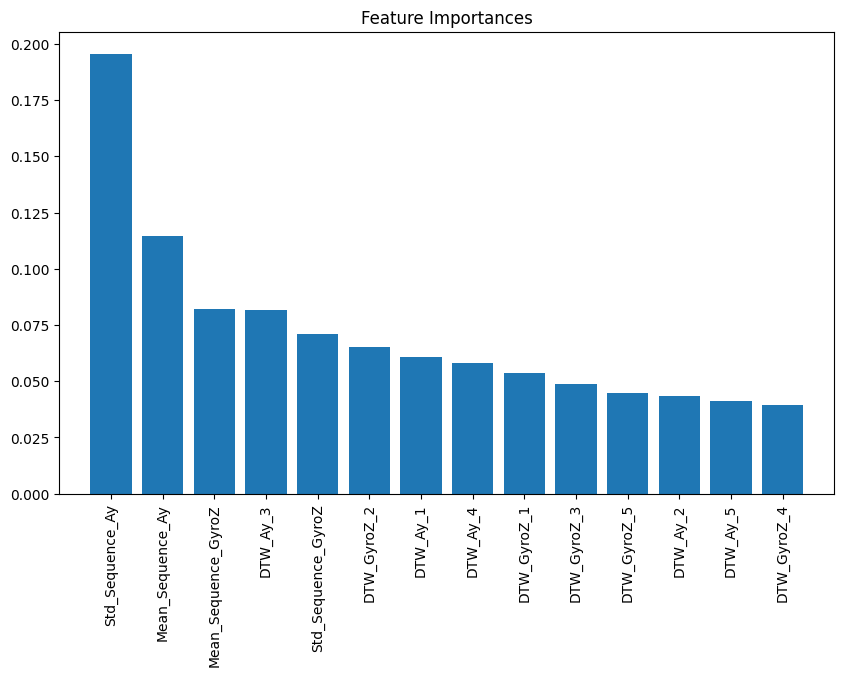

In [12]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define the features and target variable
features = df[['Mean_Sequence_Ay', 'Mean_Sequence_GyroZ', 'Std_Sequence_Ay', 'Std_Sequence_GyroZ'] + [f'DTW_Ay_{i+1}' for i in range(5)] + [f'DTW_GyroZ_{i+1}' for i in range(5)]]
target = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Optionally, feature importance can be visualized
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


# Finding optimal threshold

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import numpy as np

# Example DataFrame
df=df

# Features and target
features = ['DTW_Ay_1', 'DTW_Ay_2', 'DTW_Ay_3',
    'DTW_Ay_4', 'DTW_Ay_5', 'DTW_GyroZ_1',
    'DTW_GyroZ_2', 'DTW_GyroZ_3', 'DTW_GyroZ_4',
    'DTW_GyroZ_5']
X = df[features]
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Initialize classifiers
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)
log_reg_clf = LogisticRegression(max_iter=1000, random_state=42)

# Fit models
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)
log_reg_clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [23]:
from sklearn.metrics import classification_report

def find_optimal_thresholds(classifier, X_test, y_test, feature_names):
    thresholds = {}

    # Predict probabilities for each feature
    for feature in feature_names:
        y_prob = classifier.predict_proba(X_test[features])[:, 1]
        fpr, tpr, thresh = roc_curve(y_test, y_prob)
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresh[optimal_idx]
        thresholds[feature] = optimal_threshold

    return thresholds

# Find optimal thresholds for each classifier
rf_thresholds = find_optimal_thresholds(rf_clf, X_test, y_test, features)
gb_thresholds = find_optimal_thresholds(gb_clf, X_test, y_test, features)
log_reg_thresholds = find_optimal_thresholds(log_reg_clf, X_test, y_test, features)

print("Optimal thresholds for Random Forest:\n", rf_thresholds)
print("\nOptimal thresholds for Gradient Boosting:\n", gb_thresholds)
print("\nOptimal thresholds for Logistic Regression\n:", log_reg_thresholds)


Optimal thresholds for Random Forest:
 {'DTW_Ay_1': 0.77, 'DTW_Ay_2': 0.77, 'DTW_Ay_3': 0.77, 'DTW_Ay_4': 0.77, 'DTW_Ay_5': 0.77, 'DTW_GyroZ_1': 0.77, 'DTW_GyroZ_2': 0.77, 'DTW_GyroZ_3': 0.77, 'DTW_GyroZ_4': 0.77, 'DTW_GyroZ_5': 0.77}

Optimal thresholds for Gradient Boosting:
 {'DTW_Ay_1': 0.8630199794891946, 'DTW_Ay_2': 0.8630199794891946, 'DTW_Ay_3': 0.8630199794891946, 'DTW_Ay_4': 0.8630199794891946, 'DTW_Ay_5': 0.8630199794891946, 'DTW_GyroZ_1': 0.8630199794891946, 'DTW_GyroZ_2': 0.8630199794891946, 'DTW_GyroZ_3': 0.8630199794891946, 'DTW_GyroZ_4': 0.8630199794891946, 'DTW_GyroZ_5': 0.8630199794891946}

Optimal thresholds for Logistic Regression
: {'DTW_Ay_1': 0.49843811368480356, 'DTW_Ay_2': 0.49843811368480356, 'DTW_Ay_3': 0.49843811368480356, 'DTW_Ay_4': 0.49843811368480356, 'DTW_Ay_5': 0.49843811368480356, 'DTW_GyroZ_1': 0.49843811368480356, 'DTW_GyroZ_2': 0.49843811368480356, 'DTW_GyroZ_3': 0.49843811368480356, 'DTW_GyroZ_4': 0.49843811368480356, 'DTW_GyroZ_5': 0.498438113684